## Credit Card Fraud Detection:
This dataset is used to detect the credit card fraud detection. This is a classification problem. This is an imbalanced dataset based on target variable. So In this Project, I will use encoding and decording techniques to balanced dataset.

## About Dataset:
Digital payments are evolving, but so are cyber crimes.
According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.
In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.
This Dataset sourced by some unnamed institute.

## Problem Statement:
* The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.
* In this project, we will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.
* The dataset is taken from the Kaggle website and it has a total of 1000,000 transactions,out of which 87403 are fraudulent. Since the dataset is imbalanced, so it needs to be handled before model building.

## Challenges:
This dataset is used to detect the credit card fraud detection. This is a classification problem. This is an imbalanced dataset based on target variable. So In this Project, I will use encoding and decording techniques to balanced dataset.

These are various techniques as follows -

* Logistics Regression
* Random Forest
* Decision Tree
* KNN
* NaiveBias

## Libraries:
* Numpy : for numerical computing (https://numpy.org/doc/stable/reference/?v=20230420065146)

* Pandas: for data manipulation and analysis (https://pandas.pydata.org/pandas-docs/stable/?v=20230420065146)

* Matplotlib and Seaborn: for data visualization (https://matplotlib.org/stable/users/index.html ,https://seaborn.pydata.org/#:~:text=Seaborn%20is%20a%20Python%20data,attractive%20and%20informative%20statistical%20graphics)

* Sklearn: It is a popular machine learning library in Python that provides a wide range of tools for data preprocessing, feature selection, model training, and model evaluation.(https://scikit-learn.org/stable/)

## Project Pipeline:
The project pipeline can be briefly summarized in the following steps:

#### Data Understanding:
Here, we need to load the data and understand the features present in it. This would help us choose the features that we will need for your final model.
#### Exploratory data analytics (EDA):
Normally, in this step, we need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, we do not need to perform Z-scaling. However, you can check if there is any skewness in the data and try to mitigate it, as it might cause problems during the model-building phase.
##### Train/Test Split:
Now we are familiar with the train/test split, which we can perform in order to check the performance of our models with unseen data. Here, for validation, we can use the k-fold cross-validation method. We need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
#### Model-Building/Hyperparameter Tuning:
This is the final step at which we can try different models and fine-tune their hyperparameters until we get the desired level of performance on the given dataset. We should try and see if we get a better model by the various sampling techniques.
#### Model Evaluation:
We need to evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced it is is more important to identify which are fraudulent transactions accurately than the non-fraudulent. We need to choose an appropriate evaluation metric which reflects this business goal.


## Importing Libraries and Dataset:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
#drive.mount('/content/drive')


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/card_transdata.csv')
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## Exploratory Data Analysis (EDA):

* There are total of 8 columns: 3 continous, 4 categorical,and 1 target column
* There are 1000000 rows
* Fraud is the target variable
* No missing values

In [5]:
data.shape

(1000000, 8)

In [6]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

## Top 5 values

In [7]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## last 5 values

In [8]:
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [9]:
print(data[data.isna().any(axis=1)])

Empty DataFrame
Columns: [distance_from_home, distance_from_last_transaction, ratio_to_median_purchase_price, repeat_retailer, used_chip, used_pin_number, online_order, fraud]
Index: []



## Feature Explanation:
distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

## Finding the information of the data:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Finding the Null Values in the Dataset:

In [11]:
data.isnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False


In [12]:
data.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


There are no null values in this datset.

## Handling duplicated values:

In [13]:
data.duplicated().sum()

np.int64(0)

In [14]:
data.shape

(1000000, 8)

##  Basic statistics:

In [15]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


###  Outliers treatments:

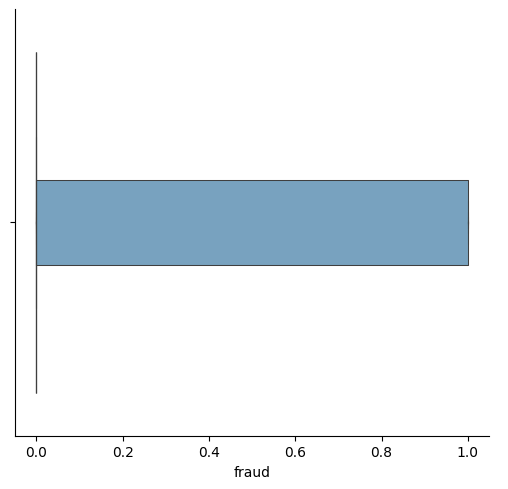

In [16]:
sns.catplot(x="fraud",kind="boxen",data=data)   ##box graph
plt.show()

In [17]:
y = data['fraud']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

,fraud
0,True
1,True
2,True
3,True
4,True
...,...
999995,True
999996,True
999997,True
999998,True


In [18]:
print(removed_outliers.value_counts())

fraud
True    1000000
Name: count, dtype: int64


There are no outliers.

## Value count of columns:

In [19]:
for i in data.columns:
  print(i, len(data[i].value_counts().index))

distance_from_home 1000000
distance_from_last_transaction 1000000
ratio_to_median_purchase_price 1000000
repeat_retailer 2
used_chip 2
used_pin_number 2
online_order 2
fraud 2


In [20]:
UsedChip = data['used_chip'].value_counts()

In [21]:
UsedChip.to_frame()

,count
used_chip,
0.0,649601
1.0,350399


In [22]:
UsedPin=data['used_pin_number'].value_counts()

In [23]:
UsedPin.to_frame()

,count
used_pin_number,
0.0,899392
1.0,100608


In [24]:
Fraud=data['fraud'].value_counts()
Fraud.to_frame()

,count
fraud,
0.0,912597
1.0,87403


In [25]:
order=data['online_order'].value_counts()
order.to_frame()

,count
online_order,
1.0,650552
0.0,349448


## Unique values of every columns:

In [26]:
data.nunique()

,0
distance_from_home,1000000
distance_from_last_transaction,1000000
ratio_to_median_purchase_price,1000000
repeat_retailer,2
used_chip,2
used_pin_number,2
online_order,2
fraud,2


## Data Insights:
In the given dataset, There are 87403 frauds which is 8.70% of given dataset.

In [27]:
fraud_c=pd.DataFrame(data["fraud"].value_counts())
fraud_c

,count
fraud,
0.0,912597
1.0,87403


In [28]:
data['fraud'] = data['fraud'].astype(int)

## "Categorical Variables"
 * Repeat Retailer: Most of the time transitions are in the same retailer.
 * Used Chip: Most of the time transitions are not using the chip, but we have a considerable number of transitions using the chip.
 * Used Pin Number: Most of the time transitions are not using the Pin Number.
 * Online Order: We have more Online Orders than Fisical.
 * Fraud: We have a few frauds in our database comparing to non frauds.

## Data Visualisation:

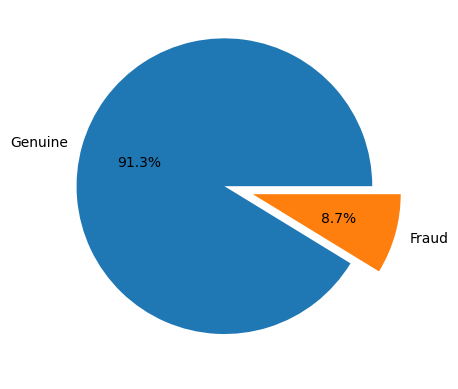

In [29]:
label_mapping = {0.0: "Genuine", 1.0: "Fraud"}  # Define label replacements
labels = [label_mapping[label] for label in fraud_c.index]  # Map index labels

plt.pie(fraud_c["count"], labels=labels, autopct='%.1f%%', explode=(0.2, 0))
plt.show()

The dataset is heavily imbalanced. As it can be seen from the charts, number of fraud transactions are significantly low when compared to non-fraud transactions.

In [30]:
fraud_c

,count
fraud,
0.0,912597
1.0,87403


### What Percent of Fraud Transactions Are Online?

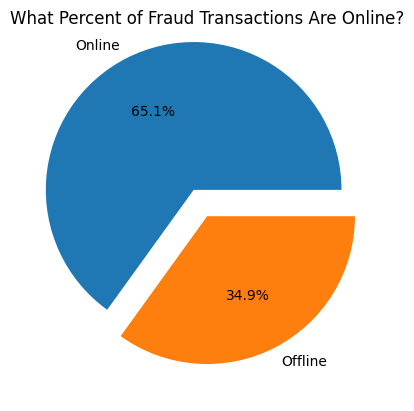

In [31]:
plt.pie(data["online_order"].value_counts(),labels=["Online","Offline"],autopct='%.1f%%', explode=(0.2,0))
plt.title("What Percent of Fraud Transactions Are Online?")
plt.show()


It shows maximum frauds have done by online which is 65.10% of given dataset.

### What Percentage of  frauds  happened using Pins?

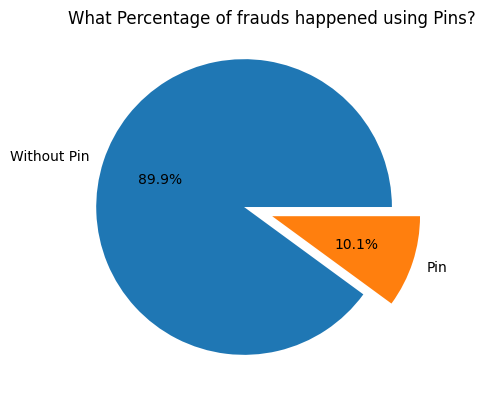

In [32]:
plt.pie(data['used_pin_number'].value_counts(),labels=["Without Pin","Pin"],autopct='%.1f%%', explode=(0.2,0))
plt.title("What Percentage of frauds happened using Pins?")
plt.show()

In [33]:
order=data['repeat_retailer'].value_counts()
order.to_frame()

,count
repeat_retailer,
1.0,881536
0.0,118464


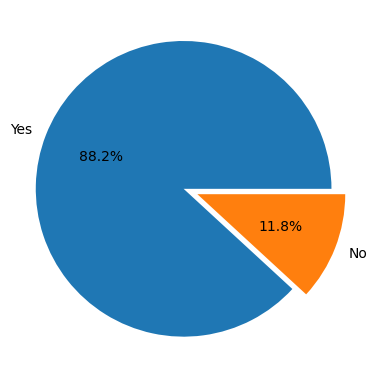

In [34]:
plt.pie(data["repeat_retailer"].value_counts(),labels=['Yes','No'],autopct='%.1f%%', explode=(0.1,0))
plt.show()

## Bivariate Analysis:
When we compare our variable target with others categorical variables, we can see some insights:

Most of the frauds are in the same retailer in a online purchase, without using the chip and without using the pin.¶

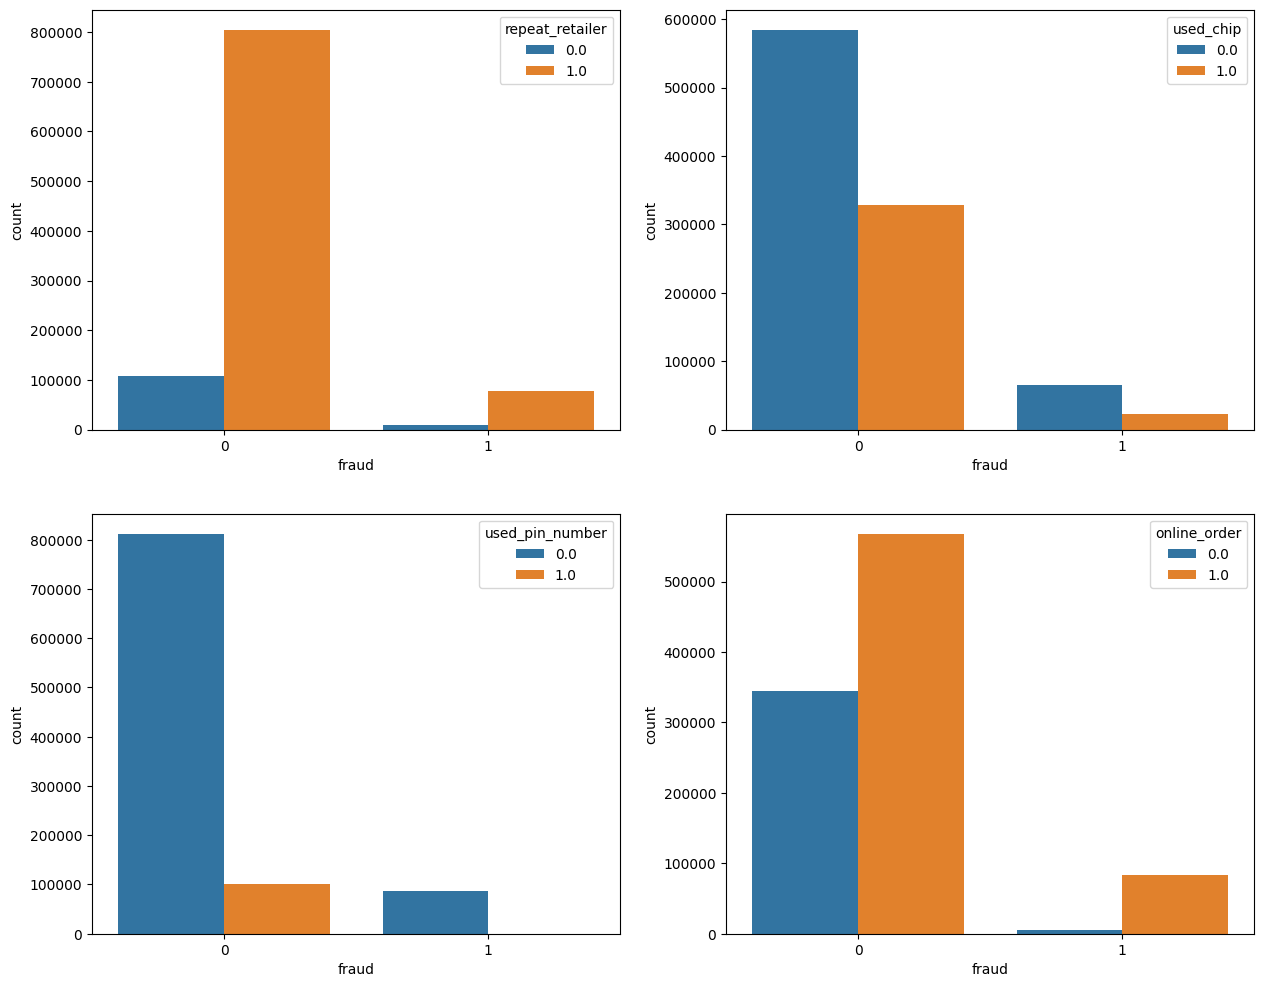

In [35]:
plt.figure(figsize = (15,12))

plt.subplot(2,2,1)
sns.countplot(x = 'fraud', hue= 'repeat_retailer', data = data)

plt.subplot(2,2,2)
sns.countplot(x = 'fraud', hue= 'used_chip', data = data)

plt.subplot(2,2,3)
sns.countplot(x = 'fraud', hue= 'used_pin_number', data = data)

plt.subplot(2,2,4)
sns.countplot(x = 'fraud', hue= 'online_order', data = data)
plt.show()

### Continuous Variables:
* Distance from home: Most of the time transitions are close to home.
* Distance from last transition: Most of the time transitions are close to the last transition.
* Ratio to Median Purchase time: Most of the time transitions are not much diferent than average.

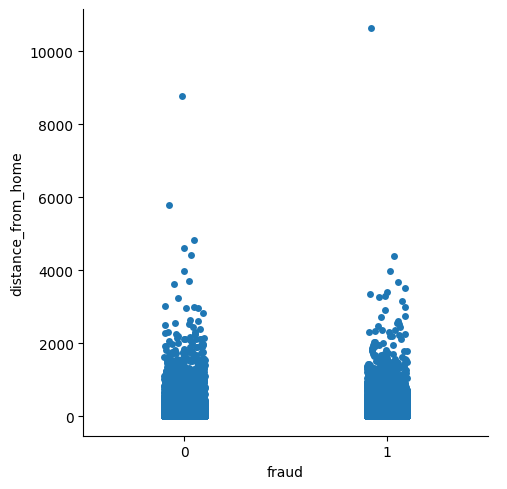

In [36]:
sns.catplot(x = "fraud", y = "distance_from_home", data = data)
plt.show()

When we compare our variable target with the variable Distance From Home we can see that we don't have a big difference, it's almost a same pattern.¶

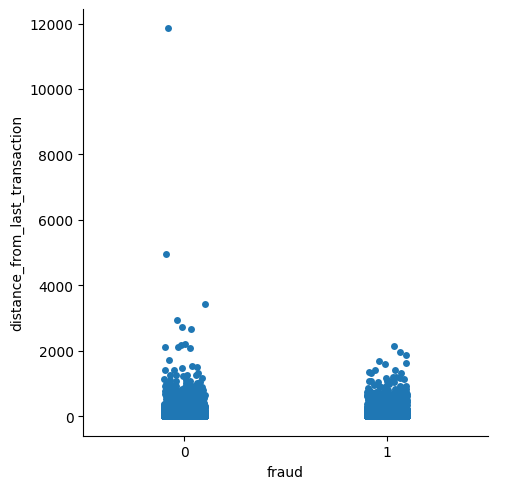

In [37]:
sns.catplot(x = "fraud", y = "distance_from_last_transaction",  data = data)
plt.show()

When we compare our variable target with the variable Distance From Last Transiction we can see that we don't have a big difference, it's almost a same pattern,

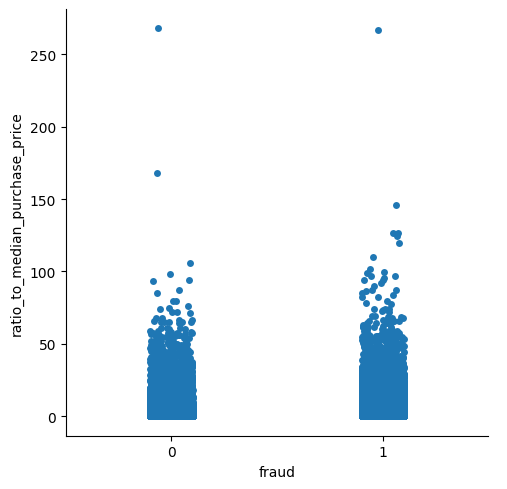

In [38]:
sns.catplot(x = "fraud", y = "ratio_to_median_purchase_price",  data = data)
plt.show()

When we compare our target variable with the Ratio to Median Purchase Time variable we can see that we have more frauds when the purchase value is far from the Median.¶

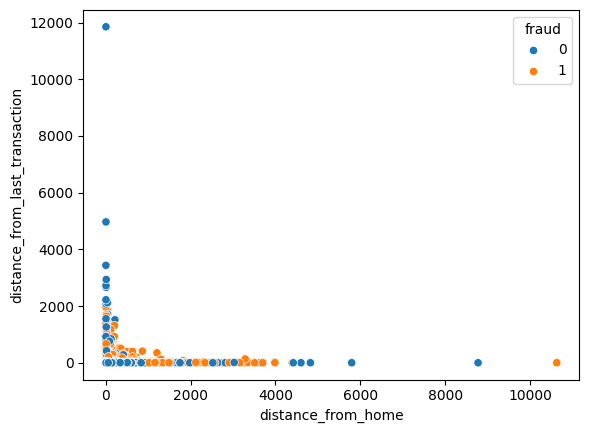

In [39]:
sns.scatterplot(x='distance_from_home', y='distance_from_last_transaction', data=data, hue='fraud')
plt.show()

## Making Dataset small just for Visualisation:

In [40]:
data_new = data.sample(n=10000, random_state=42)

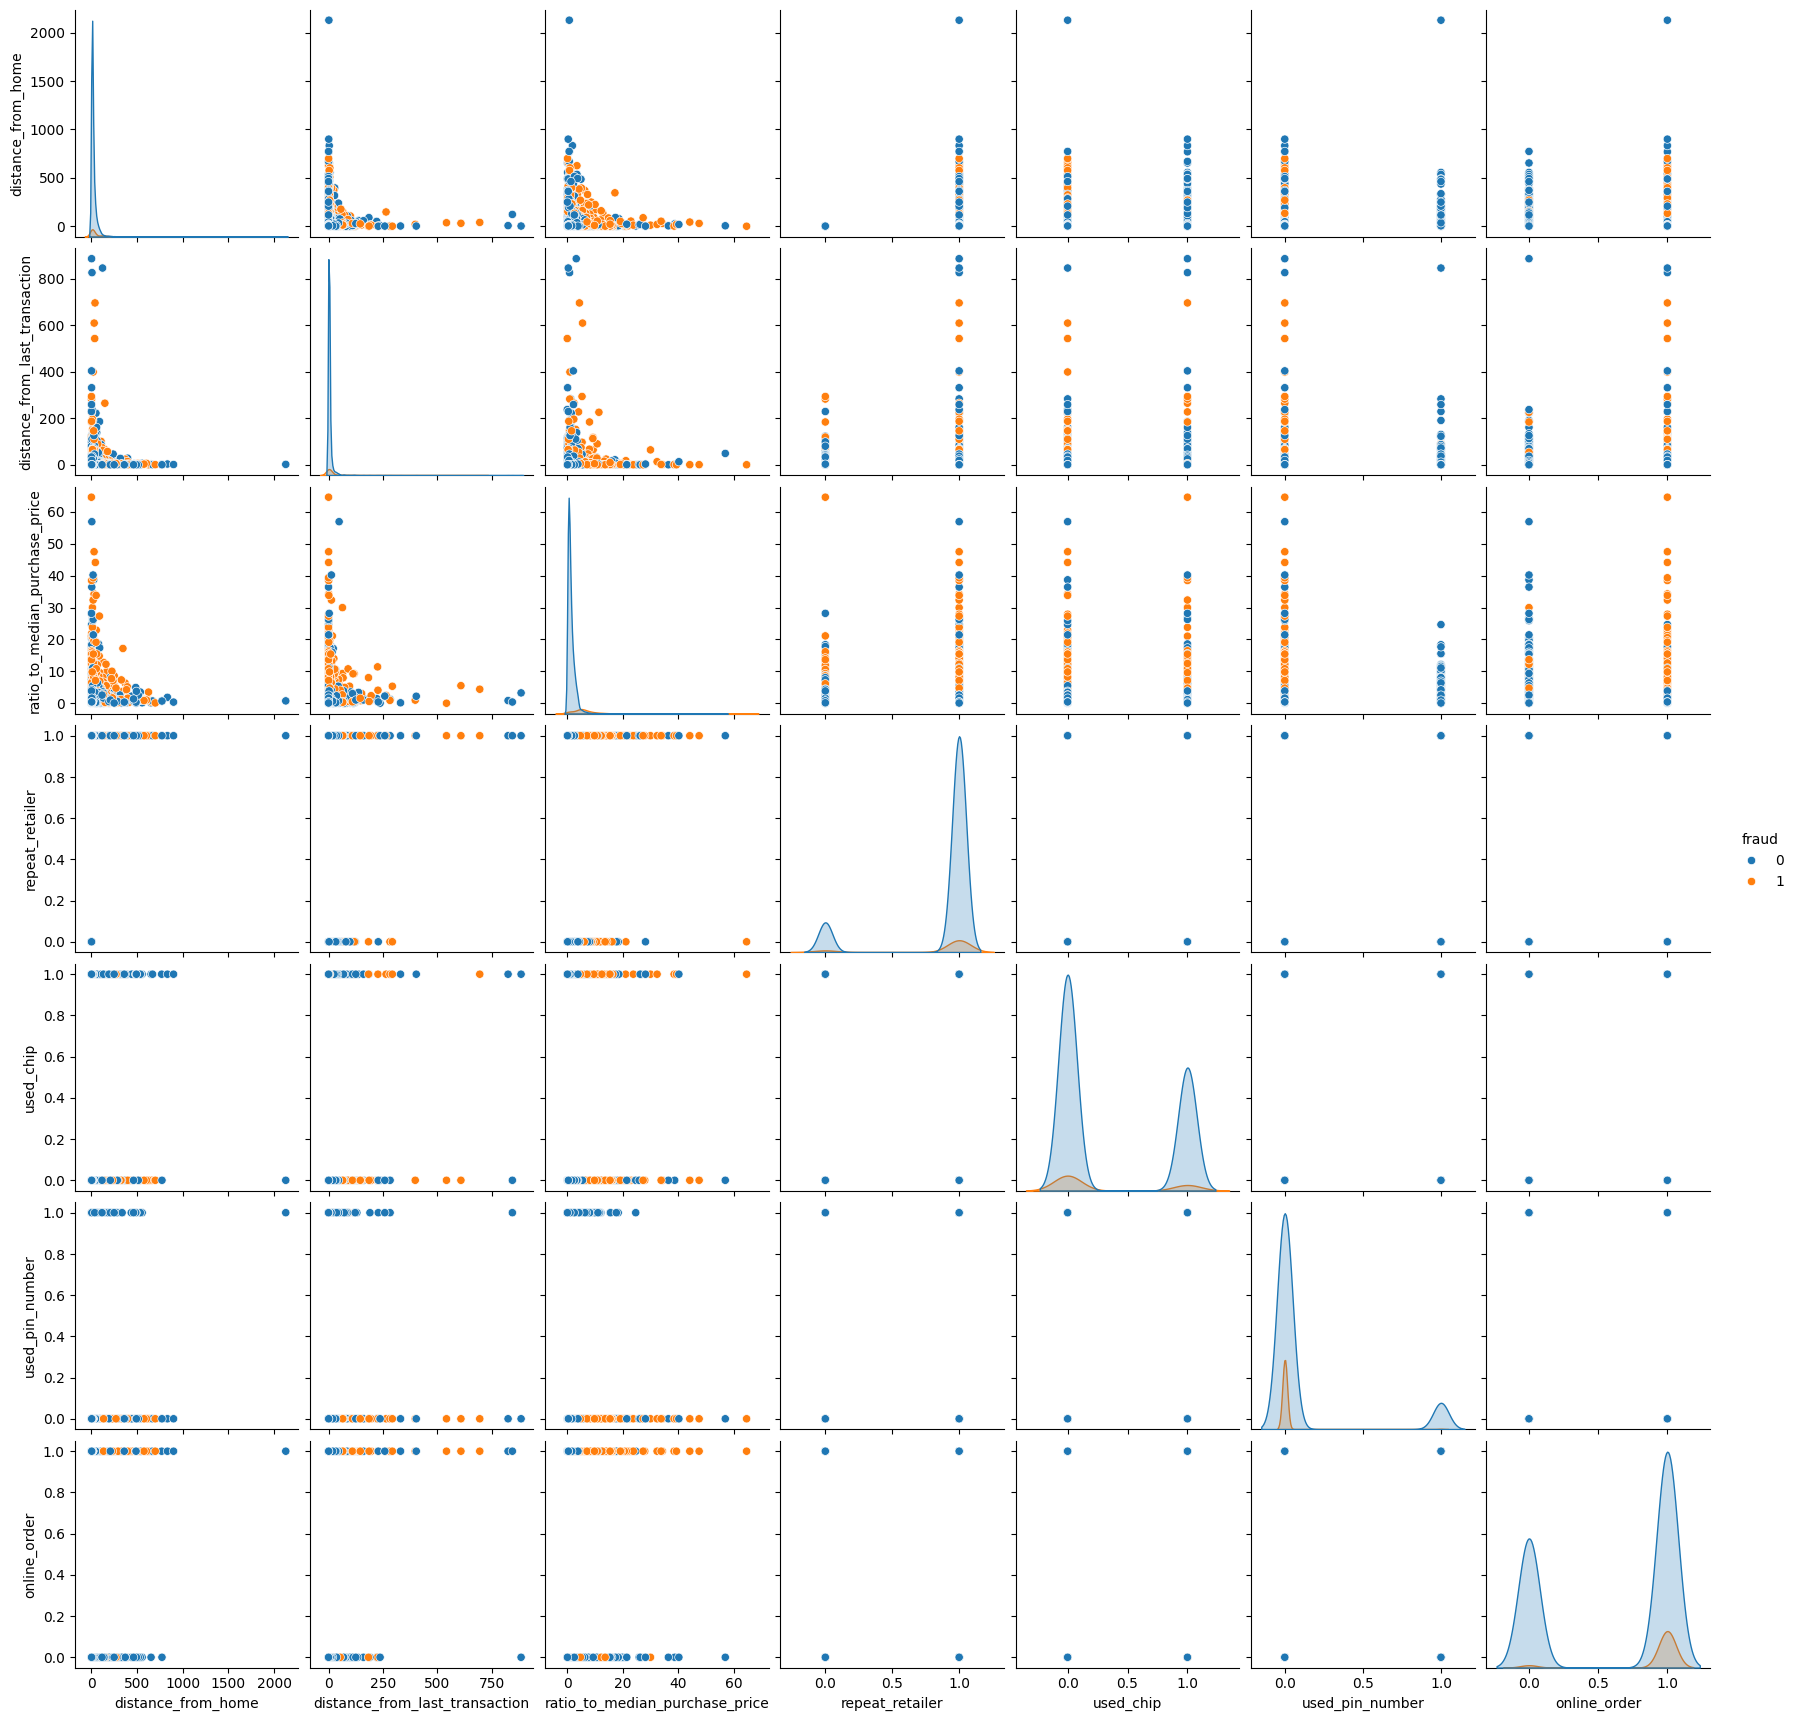

In [41]:
sns.pairplot(data_new ,hue='fraud')
plt.show()

## Correlation:

In [42]:
data.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


Verifying the correlation between our variables, here we can see that we don't have a strong correlation.¶

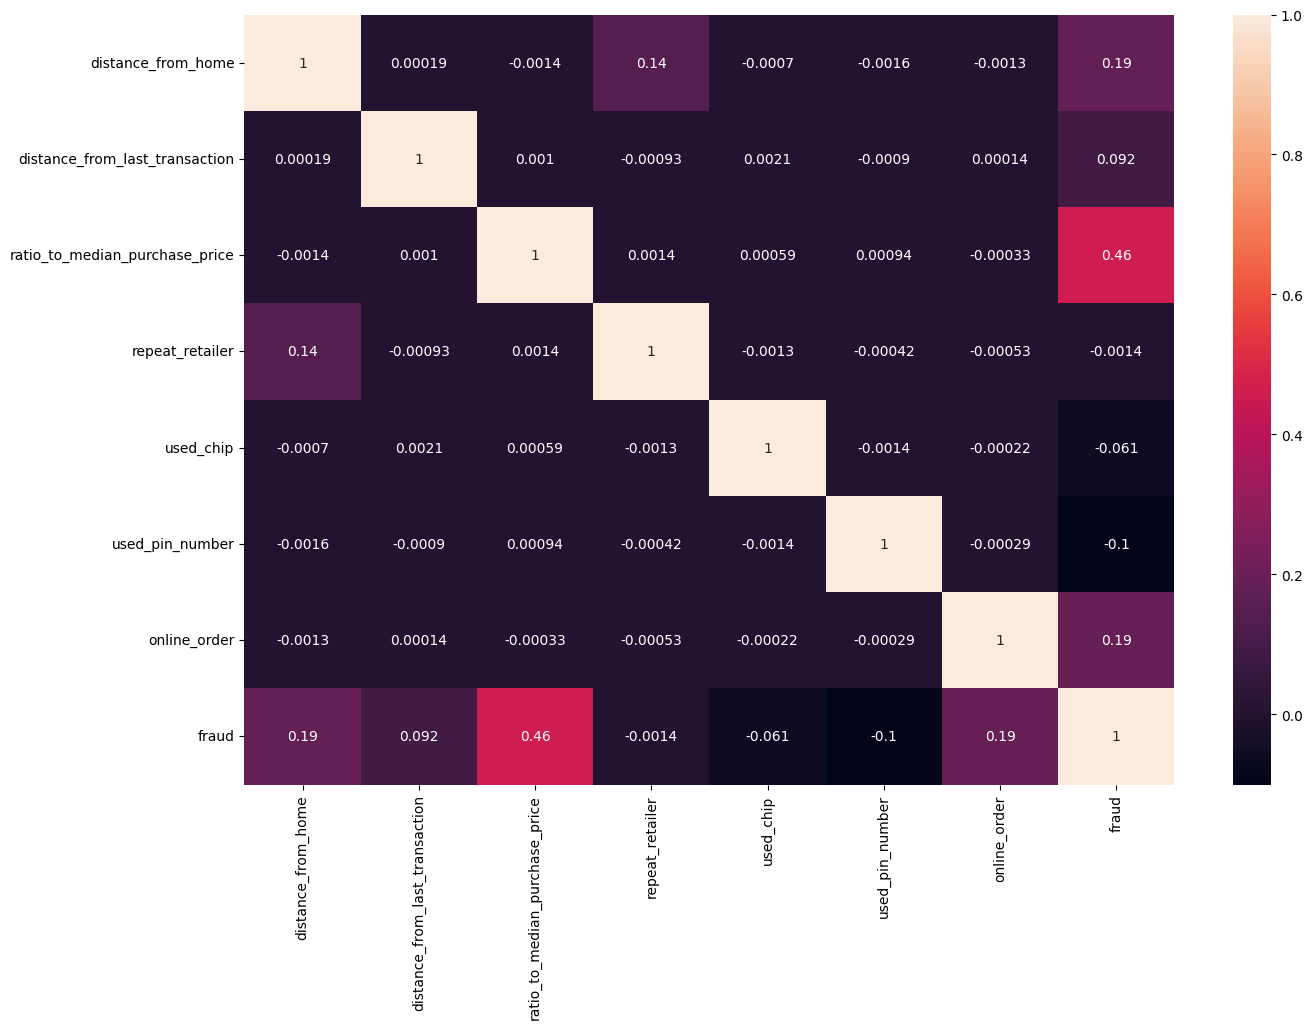

In [43]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True)

plt.show()

Most correlation values are very close to 0, which indicates that our features are weakly correlated

##### Putting feature variables into X

In [44]:
X=data.drop(["fraud"], axis = 1)

##### Putting target variable to y

In [45]:
Y=data["fraud"]

## Splitting the Dataset into Train & Test:

In [46]:
# Import library
from sklearn.model_selection import train_test_split

In [47]:
X_train_v, X_test, Y_train_v, Y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train_v, Y_train_v,
                                                            test_size=0.2, random_state=42)


In [48]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

In [49]:
w_p = Y_train.value_counts()[0] / len(Y_train)
w_n = Y_train.value_counts()[1] / len(Y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.08753928571428571
Non-Fraudulant transaction weight: 0.9124607142857143


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, average_precision_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [51]:
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_validate.shape)

(560000, 7)
(300000, 7)
(140000, 7)
(560000,)
(300000,)
(140000,)


## ANN


In [52]:
#!pip install -q tensorflow

In [53]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,961 (535.00 KB)

 Trainable params: 135,425 (529.00 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [54]:
METRICS = [
    keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.keras')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, Y_train,
    validation_data=(X_validate, Y_validate),
    batch_size=2048,
    epochs=100,
    #class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.0032 - fn: 1524.7854 - fp: 62846.6406 - loss: 0.6115 - precision: 0.2423 - recall: 0.9042 - tn: 195101.0781 - tp: 23135.6660 - val_accuracy: 0.0042 - val_fn: 2155.0000 - val_fp: 519.0000 - val_loss: 0.1506 - val_precision: 0.9511 - val_recall: 0.8241 - val_tn: 127229.0000 - val_tp: 10097.0000
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0254 - fn: 1165.8727 - fp: 10596.6182 - loss: 0.2403 - precision: 0.6719 - recall: 0.9555 - tn: 247218.3438 - tp: 23627.3457 - val_accuracy: 0.0330 - val_fn: 1215.0000 - val_fp: 141.0000 - val_loss: 0.0509 - val_precision: 0.9874 - val_recall: 0.9008 - val_tn: 127607.0000 - val_tp: 11037.0000
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0368 - fn: 1706.2545 - fp: 3748.8799 - loss: 0.1159 - precision: 0.8534 - recall: 0.9313 - tn: 254210.3125 - tp: 22942.7266 - val_accuracy: 0.0430 - val_fn: 1188.0000 - val_fp: 32.0000 - val_loss: 0.0339 - val

In [55]:
score = model.evaluate(X_test, Y_test)
print(score)

9375/9375 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.0648 - fn: 33.9846 - fp: 46.2069 - loss: 0.0017 - precision: 0.9966 - recall: 0.9970 - tn: 136943.4375 - tp: 13008.3604
[0.001627190737053752, 0.06555332988500595, 66.0, 94.0, 273777.0, 26063.0, 0.9964063167572021, 0.9974740743637085]


In [56]:
assert not np.isnan(X_train).any(), "X_train has NaNs"
assert not np.isinf(X_train).any(), "X_train has infs"
assert not np.isnan(X_test).any(), "X_test has NaNs"
assert not np.isinf(X_test).any(), "X_test has infs"

In [57]:
nan_indices = np.argwhere(np.isnan(X_test))
print(f"Total NaNs in X_test: {len(nan_indices)}")
print("Sample NaN locations (row, column):", nan_indices[:10])

Total NaNs in X_test: 0
Sample NaN locations (row, column): []


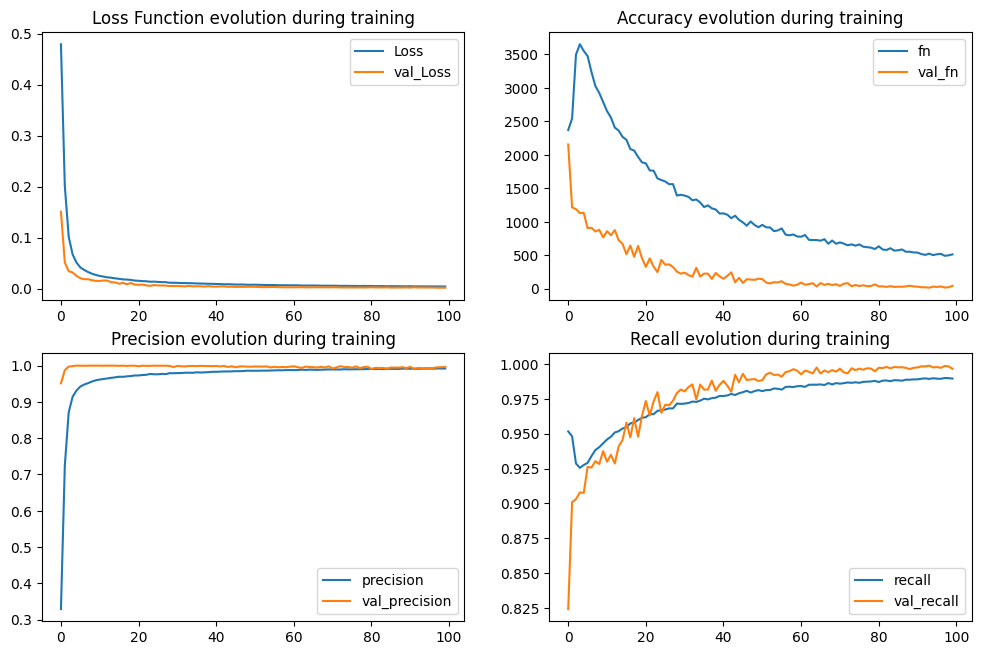

In [58]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [59]:
print(np.unique(Y_train))

[0. 1.]


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, average_precision_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [61]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(Y_train, y_train_pred.round(), train=True)
print_score(Y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': accuracy_score(Y_train, y_train_pred.round()),
        'Test': accuracy_score(Y_test, y_test_pred.round()),
    },
}

17500/17500 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
Train Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999724      0.996778  0.999466       0.998251       0.999466
recall          0.999691      0.997124  0.999466       0.998407       0.999466
f1-score        0.999707      0.996951  0.999466       0.998329       0.999466
support    510978.000000  49022.000000  0.999466  560000.000000  560000.000000
_______________________________________________
Confusion Matrix: 
 [[510820    158]
 [   141  48881]]

Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999759      0.996406  0.999467       0.998083       0.999467
recall          0.999657      0.997474

## Support Vector Machine:

In [62]:
from sklearn.svm import SVC

In [63]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

In [64]:
# SVM Model
from sklearn.linear_model import SGDClassifier
model6 = SGDClassifier(loss='hinge', max_iter=1000)
model6.fit(X_train, Y_train)
y_pred=model6.predict(X_test)
model6.score(X_train,Y_train)*100
model6.score(X_test,Y_test)*100

96.10300000000001

In [66]:
y_train_pred = model6.predict(X_train)
y_test_pred = model6.predict(X_test)

print_score(Y_train, y_train_pred, train=True)
print_score(Y_test, y_test_pred, train=False)

scores_dict['SVM'] = {
        'Train': accuracy_score(Y_train,y_train_pred),
        'Test': accuracy_score(Y_test, y_test_pred),
}

Train Result:
Accuracy Score: 96.16%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.967230      0.879448  0.961552       0.923339       0.959546
recall          0.991454      0.649871  0.961552       0.820663       0.961552
f1-score        0.979192      0.747428  0.961552       0.863310       0.958904
support    510978.000000  49022.000000  0.961552  560000.000000  560000.000000
_______________________________________________
Confusion Matrix: 
 [[506611   4367]
 [ 17164  31858]]

Test Result:
Accuracy Score: 96.10%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.966998      0.874197   0.96103       0.920597       0.958915
recall          0.991138      0.645451   0.96103       0.818295       0.961030
f1-score        0.978919      0.742608   0.96103 


Accuracy for Logistic Regression = 96.10300000000001


Classification_report :-

               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    273871
         1.0       0.87      0.65      0.74     26129

    accuracy                           0.96    300000
   macro avg       0.92      0.82      0.86    300000
weighted avg       0.96      0.96      0.96    300000



Confusion_Matrix : 



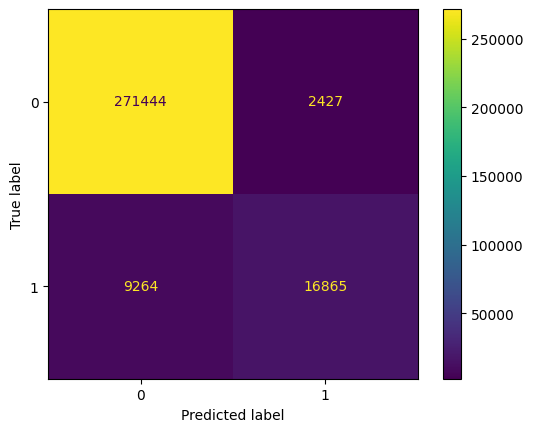

In [65]:
accuracy6=accuracy_score(Y_test, y_pred)*100
print('\nAccuracy for Logistic Regression =',accuracy6)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix : \n')

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## KNeighborsClassifier:

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=3)
model5.fit(X_train,Y_train)

y_train_pred = model5.predict(X_train)
y_test_pred = model5.predict(X_test)

print_score(Y_train, y_train_pred, train=True)
print_score(Y_test, y_test_pred, train=False)

scores_dict['KNeighborsClassifier'] = {
        'Train': accuracy_score(Y_train,y_train_pred),
        'Test': accuracy_score(Y_test, y_test_pred),
}

Train Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.999589      0.998262  0.999473       0.998925       0.999473
recall          0.999834      0.995716  0.999473       0.997775       0.999473
f1-score        0.999711      0.996987  0.999473       0.998349       0.999473
support    510978.000000  49022.000000  0.999473  560000.000000  560000.000000
_______________________________________________
Confusion Matrix: 
 [[510893     85]
 [   210  48812]]

Test Result:
Accuracy Score: 99.85%
_______________________________________________
Classification Report:
                     0.0           1.0  accuracy      macro avg   weighted avg
precision       0.998953      0.993770  0.998503       0.996361       0.998501
recall          0.999408      0.989016  0.998503       0.994212       0.998503
f1-score        0.999180      0.991387  0.998503 

In [ ]:
accuracy5=accuracy_score(Y_test, y_pred)*100
print('\nAccuracy for Logistic Regression =',accuracy5)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix : \n')

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Comparing Accuracy of All Model:

           ANNs       SVM  KNeighborsClassifier
Train  0.999466  0.961552              0.999473
Test   0.999467  0.961030              0.998503


<Axes: >

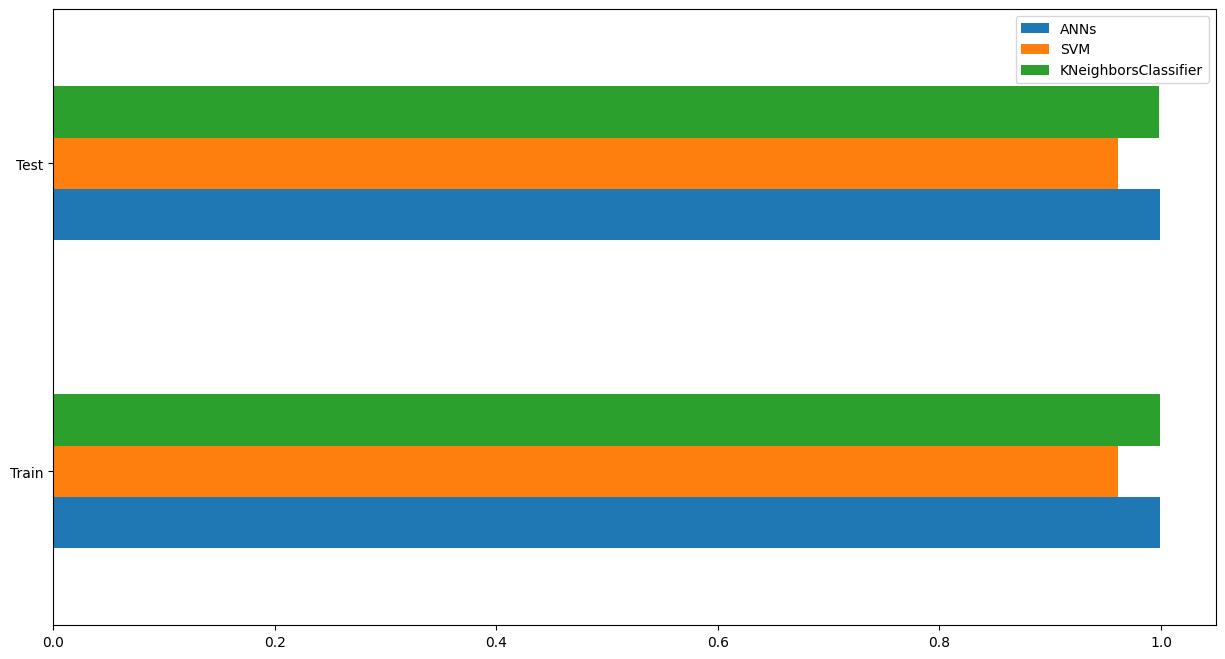

In [68]:
scores_df = pd.DataFrame(scores_dict)
print(scores_df)
scores_df.plot(kind='barh', figsize=(15, 8))

# Conclusion:
## The result matches with the parent paper where ANN has the highest accuracy, followed by KNN and lastly SVM

# Additional Model for Upcoming Implementation / Reference
## Logistic Regression:

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report

In [71]:
model1=LogisticRegression()

In [72]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [73]:
y_pred=model1.predict(X_test)

In [74]:
model1.score(X_train,Y_train)*100

95.89678571428571

In [75]:
model1.score(X_test,Y_test)*100

95.855


Accuracy for Logistic Regression = 95.855


Classification_report :-

               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273871
         1.0       0.89      0.60      0.72     26129

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000



Confusion_Matrix : 



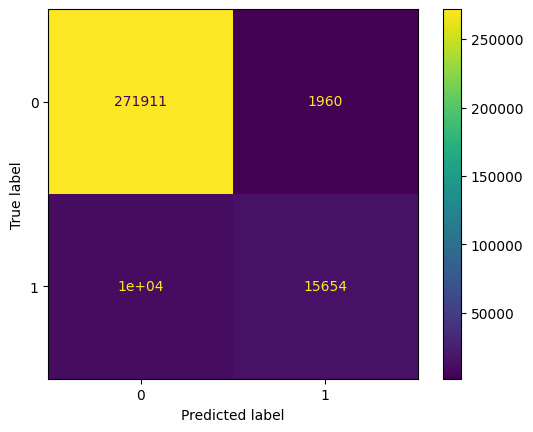

In [76]:
accuracy1=accuracy_score(Y_test, y_pred)*100
print('\nAccuracy for Logistic Regression =',accuracy1)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix : \n')

# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Pretty nice! detected 95.7% of the fraudulent transactions! But also falsely classified 4.30% of the non-fraud transactions as fraudulent. Let's use other method to find a more balanced threshold.

## DecisionTreeClassifier:

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model2=DecisionTreeClassifier()

In [79]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [80]:
y_pred = model2.predict(X_test)

In [81]:
accuracy2=accuracy_score(Y_test, y_pred)*100
accuracy2

99.99900000000001


Accuracy for Decision Tree Classifier = 99.99900000000001


Classification_report :-

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273871
         1.0       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



Confusion_Matrix :-



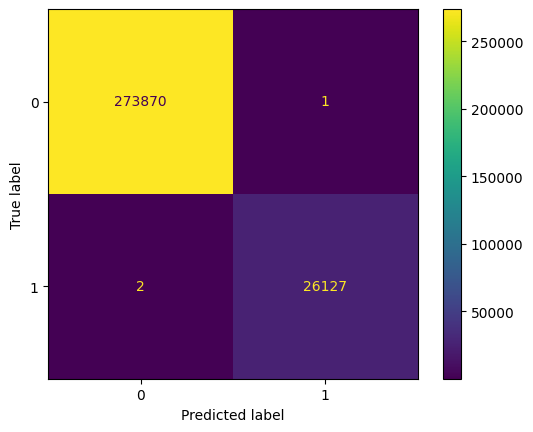

In [82]:
print('\nAccuracy for Decision Tree Classifier =',accuracy2)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix :-\n')
# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Decision Tree method fit the dataset incredibly with  100% accuracy. It is very remarkable that there are only 1 false positives and 8 false negatives.

## RandomForestClassifier:

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
model3=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)

In [85]:
model3.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [86]:
y_pred = model3.predict(X_test)

In [87]:
accuracy3=accuracy_score(Y_test, y_pred)*100
accuracy3

99.998


Accuracy for Random Forest Classifier = 99.998


Classification_report :-

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273871
         1.0       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



Confusion_Matrix :-



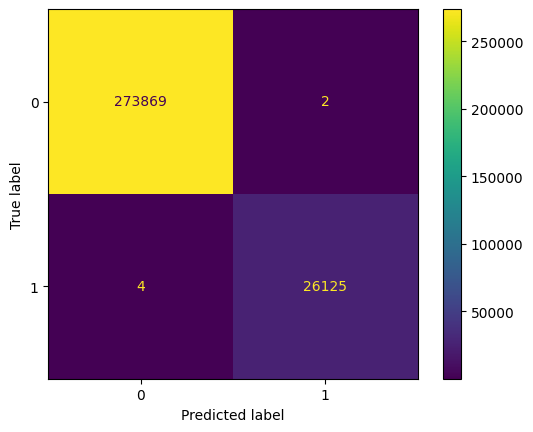

In [88]:
print('\nAccuracy for Random Forest Classifier =',accuracy3)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix :-\n')
# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

AWESOME! 100% detection !! Random Forest wins this race!!

## GaussianNB:

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
model4 = GaussianNB()

In [91]:
model4.fit(X_train,Y_train)

GaussianNB()

In [92]:
y_pred = model4.predict(X_test)

In [93]:
model4.score(X_train,Y_train)

0.9495017857142857

In [94]:
model4.score(X_test,Y_test)

0.94916

In [95]:
accuracy4 =accuracy_score(Y_test,y_pred)*100
accuracy4

94.916


Accuracy for Gaussian NB = 94.916


Classification_report :-

               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    273871
         1.0       0.77      0.59      0.67     26129

    accuracy                           0.95    300000
   macro avg       0.87      0.79      0.82    300000
weighted avg       0.95      0.95      0.95    300000



Confusion_Matrix :-



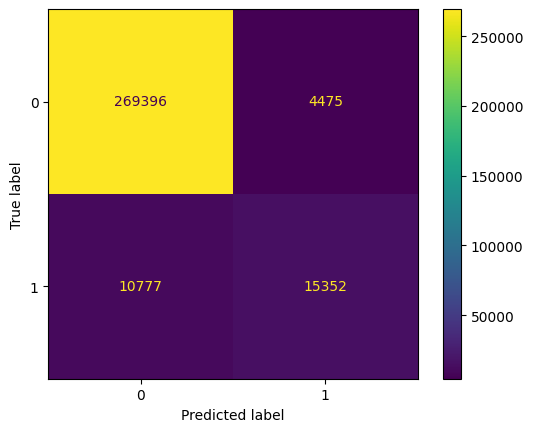

In [96]:

print('\nAccuracy for Gaussian NB =',accuracy4)
print('\n\nClassification_report :-\n\n',classification_report(Y_test, y_pred))
print('\n\nConfusion_Matrix :-\n')
# Compute the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Here we have 94.8% accuracy, this is a very good model to use to visualize when it's a fraud and it's a good model to see if it's not a fraud too.

## Comparing Accuracy of All Model

In [97]:
print('Accuracy for Logistic Regression =',accuracy1)
print('Accuracy for Decision Tree Classifier =',accuracy2)
print('Accuracy for Random Forest Classifier =',accuracy3)
print('Accuracy for Gaussian NB =',accuracy4)
print('Accuracy for KNN =',accuracy5)

Accuracy for Logistic Regression = 95.855
Accuracy for Decision Tree Classifier = 99.99900000000001
Accuracy for Random Forest Classifier = 99.998
Accuracy for Gaussian NB = 94.916


NameError: name 'accuracy5' is not defined

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
report = data.profile_report()
report

In [ ]:
report.to_file("report.html")

## Conclusion:
In this project we can see that we have numerical variables and our categorical variables is already encoded, in our Data Visualization we can get some good insights
When we look to Machine Learning Models most of them has a good precision but not all can visualize if it's a fraud or no.
Other interesting thing to see is the most important variables in the Decision Tree Model, We can see that the most important variable of model is ratio_to_median_purchase_price, which shows that when it is a fraud, it is likely that the purchase price will have a large variance than normal
###  Best Models to use with Best Accuracy score:

- Decision Tree
- Random Forest
- KNN

###  Models with Good Accuracy:
- Naive Bayes
- Logistic Regression


#### The best model we have when we analyze the dataset, are the Random Forest and Decision Tree model ,in which we get 99.99% accuracy.

### Guided By- Shalini kumari
### Submitted By- Shalinee kumari